In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns

In [59]:
dataset = pd.read_csv('iris.csv', index_col=0)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [114]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [116]:
dataset.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [118]:
dataset.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [144]:
features = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #X
target = dataset['Species'] #Y

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.15)

In [156]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [160]:
model.coef_

array([[-0.43901877,  0.87895937, -2.38489278, -1.03539078],
       [ 0.48917464, -0.44660431, -0.21472483, -0.7531678 ],
       [-0.05015587, -0.43235506,  2.59961761,  1.78855857]])

In [162]:
model.intercept_

array([  9.62381833,   2.58754766, -12.21136598])

In [164]:
ypred = model.predict(xtest)

In [172]:
print(classification_report(ytest, ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.96        23
      macro avg       0.95      0.96      0.95        23
   weighted avg       0.96      0.96      0.96        23



<Axes: xlabel='col_0', ylabel='Species'>

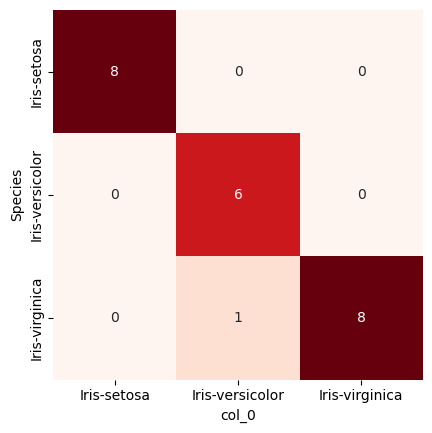

In [184]:
sns.heatmap(pd.crosstab(ytest, ypred), cbar=False, annot=True, cmap='Reds', square=True)

50.058
